#### Front Matter: CASA0013: Foundations of Spatial Data Science

## Rental scale of Airbnb listings in London

### Student ID: 20144682

### Word Count: 1447

# Reproducible Analysis

In [4]:
import os
import pysal as p
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import mapclassify as mc
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from legendgram import legendgram
import palettable.matplotlib as palmpl

## 1 Reading Data

### 1.1 Airbnb Data
Source: http://data.insideairbnb.com/united-kingdom/england/london/2021-10-10/data/listings.csv.gz

In [6]:
# Load in the Airbnb data.
df = pd.read_csv('https://github.com/jinfenggao/CASA0013-Foundations_of_Spatial_Data_Science/blob/main/data/listings.csv.gz?raw=true', compression='gzip')
print(f"{df.shape[0]:} x {df.shape[1]}")
df.head()

67903 x 74


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20211010233627,2021-10-12,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,4.89,4.63,4.74,NaN,f,2,1,1,0,0.17
1,15400,https://www.airbnb.com/rooms/15400,20211010233627,2021-10-12,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,4.82,4.93,4.73,NaN,f,1,1,0,0,0.79
2,17402,https://www.airbnb.com/rooms/17402,20211010233627,2021-10-12,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,4.66,4.85,4.59,NaN,f,2,2,0,0,0.35
3,17506,https://www.airbnb.com/rooms/17506,20211010233627,2021-10-12,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
4,24328,https://www.airbnb.com/rooms/24328,20211010233627,2021-10-12,"Battersea bedroom & studio, parking, shared ga...","Artist house, bright high ceiling rooms, priva...","- Battersea is a quiet family area, easy acces...",https://a0.muscache.com/pictures/c4ffa398-ebfd...,41759,https://www.airbnb.com/users/show/41759,...,4.93,4.58,4.64,NaN,f,1,1,0,0,0.77


### 1.2 London MSOA Data

#### 1.2.1 Load in the MSOA data
Source: https://geoportal.statistics.gov.uk/datasets/middle-layer-super-output-areas-december-2011-boundaries-full-extent-bfe-ew-v3/

<AxesSubplot:>

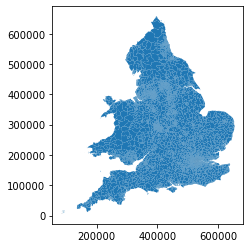

In [7]:
# Load in the MSOA data.
msoa = gpd.read_file('https://github.com/jinfenggao/CASA0013-Foundations_of_Spatial_Data_Science/blob/main/data/Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip?raw=true')
msoa.plot()

#### 1.2.2 Create London Boundaries
Source: https://data.london.gov.uk/dataset/london_boroughs

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

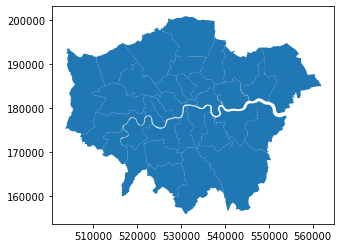

In [8]:
# Load in the London Brough Boroughs data.
boroughs = gpd.read_file('https://github.com/jinfenggao/CASA0013-Foundations_of_Spatial_Data_Science/blob/main/data/Boroughs.gpkg?raw=true')
boroughs.plot()

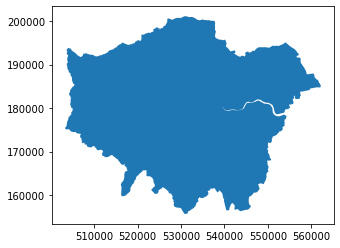

In [9]:
# Create the London Boundaries.
london = gpd.GeoDataFrame(gpd.GeoSeries(data=boroughs.unary_union, crs='epsg:27700')).rename(columns={0:'original'})
london['geometry'] = london.original.buffer(200)
london = london.set_geometry('geometry')
london.plot();

#### 1.2.3 Create London MSOA

,OBJECTID,MSOA11CD,MSOA11NM,MSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,index_right,original
0,1,E02000001,City of London 001,City of London 001,532384,181355,-0.093490,51.51561,2.906361e+06,8936.818478,"POLYGON ((532135.138 182198.131, 532158.250 18...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
1,2,E02000002,Barking and Dagenham 001,Barking and Dagenham 001,548267,189685,0.138756,51.58652,2.166163e+06,8150.405928,"POLYGON ((548881.563 190845.265, 548881.125 19...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
2,3,E02000003,Barking and Dagenham 002,Barking and Dagenham 002,548259,188520,0.138149,51.57605,2.143568e+06,9118.196243,"POLYGON ((549102.438 189324.625, 548954.517 18...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
3,4,E02000004,Barking and Dagenham 003,Barking and Dagenham 003,551004,186412,0.176828,51.55638,2.491467e+06,8206.551627,"POLYGON ((551550.056 187364.705, 551478.000 18...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
4,5,E02000005,Barking and Dagenham 004,Barking and Dagenham 004,548733,186824,0.144267,51.56069,1.186053e+06,6949.688798,"POLYGON ((549099.634 187656.076, 549161.375 18...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6783,6784,E02006927,Greenwich 034,Greenwich 034,540765,175168,0.024750,51.45799,2.526112e+06,8592.913078,"POLYGON ((541029.881 176265.023, 541101.997 17...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
6784,6785,E02006928,Greenwich 035,Greenwich 035,537902,177443,-0.015540,51.47914,5.405753e+05,6849.063388,"MULTIPOLYGON (((538300.370 177956.634, 538290....",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
6785,6786,E02006929,Greenwich 036,Greenwich 036,540015,179091,0.015515,51.49343,2.550052e+06,13109.533457,"POLYGON ((540054.362 179353.134, 540220.354 17...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."
6786,6787,E02006930,Greenwich 037,Greenwich 037,540126,178333,0.016812,51.48659,8.679553e+05,7492.395145,"POLYGON ((539552.478 178604.042, 539533.000 17...",0,"POLYGON ((534747.800 159517.800, 534588.000 15..."


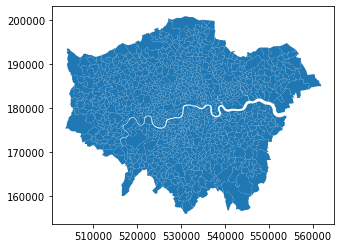

In [10]:
# Create the London MSOA.
london_msoa = gpd.sjoin(msoa, london, op='within')
london_msoa.plot();
london_msoa

### 1.3 Load London Ward data

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16..."
...,...,...,...,...,...,...,...,...
644,Aldgate,E05000002,11.227,0.0,E09000001,City of London,51182,"POLYGON ((533326.100 181359.400, 533336.900 18..."
645,Broad Street,E05000008,8.188,0.0,E09000001,City of London,50669,"POLYGON ((532703.800 181263.500, 532707.800 18..."
646,Coleman Street,E05000012,15.404,0.0,E09000001,City of London,122520,"POLYGON ((532880.500 181723.400, 532884.200 18..."
647,Portsoken,E05000021,6.209,0.0,E09000001,City of London,122516,"POLYGON ((533814.300 180968.900, 533757.200 18..."


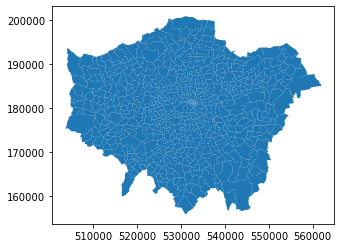

In [11]:
# Load in the London Ward.
london_ward=gpd.read_file('https://github.com/jinfenggao/CASA0013-Foundations_of_Spatial_Data_Science/blob/main/data/London_ward.gpkg?raw=true')
london_ward = london_ward.to_crs('epsg:27700')
london_ward.plot();
london_ward

In [12]:
# Drop the useless columns.
drop_columns = ['NONLD_AREA','LB_GSS_CD','GSS_CODE','POLY_ID','BOROUGH']
london_ward.drop(columns=drop_columns, axis=1,inplace=True)
london_ward

,NAME,HECTARES,geometry
0,Chessington South,755.173,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,259.464,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,145.390,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,268.506,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,187.821,"POLYGON ((522071.000 168144.900, 522063.900 16..."
...,...,...,...
644,Aldgate,11.227,"POLYGON ((533326.100 181359.400, 533336.900 18..."
645,Broad Street,8.188,"POLYGON ((532703.800 181263.500, 532707.800 18..."
646,Coleman Street,15.404,"POLYGON ((532880.500 181723.400, 532884.200 18..."
647,Portsoken,6.209,"POLYGON ((533814.300 180968.900, 533757.200 18..."


## 2 Pre-process data

### 2.1 Select the useful data

In [123]:
# Select useful data of this study.
sub_cols = ['id', 'name', 'host_id', 'host_name',
            'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'price', 'availability_365', 
            'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']
df = df[sub_cols]
df.set_index('id', inplace=True)
df.head()

,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
id,,,,,,,,,,,,,,
13913,Holiday London DB Room Let-on going,54730,Alina,Islington,51.56861,-0.11270,Private room in rental unit,Private room,$65.00,339,2,1,1,0
15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,$75.00,2,1,1,0,0
17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,$307.00,320,2,2,0,0
17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,Hammersmith and Fulham,51.47935,-0.19743,Private room in townhouse,Private room,$150.00,364,2,0,2,0
24328,"Battersea bedroom & studio, parking, shared ga...",41759,Joe,Wandsworth,51.47119,-0.16256,Entire townhouse,Entire home/apt,$200.00,273,1,1,0,0


### 2.2 Check data accuracy and fill in missing data

#### 2.2.1 Number of room types

In [124]:
# Check Room Types.
df_room_types = df.drop_duplicates(subset='room_type')
print(df_room_types['room_type'])

id
13913       Private room
15400    Entire home/apt
49970         Hotel room
89094        Shared room
Name: room_type, dtype: object


Obviously, there are four room types: Private room, Entire home/apt, Hotel room and Shared room. But the number of Hotel room listings the host has in London is missing from the dataset. For the convenience of research, we need to fill in the missing data. In other words, we need to add a column named calculated_host_listings_count_hotel_rooms.

#### 2.2.2 Calculate the correct value of the number of different room listings the host has in London

In [125]:
# Check Host Id and creat a new initial form named host_listings.
df1 = pd.DataFrame()
df1['host_id'] = df['host_id']
df1['room_type'] = df['room_type']
test = df1.groupby('host_id')['room_type'].value_counts()
host_listings = pd.DataFrame()
host_listings['host_id'] = df.drop_duplicates(subset='host_id')['host_id']
host_listings

,host_id
id,
13913,54730
15400,60302
17402,67564
17506,67915
24328,41759
...,...
52703734,19529644
52705071,22363308
52708661,84302606


In [126]:
# Calculate the correct value of the number of different room listings the host has in London.
df2 = pd.DataFrame({"listing_count":test}).reset_index()
df2_entire = df2[df2.room_type=='Entire home/apt'][['host_id','listing_count']]
df2_entire.columns = ['host_id','host_listings_count_entire_homes']
df2_private = df2[df2.room_type=='Private room'][['host_id','listing_count']]
df2_private.columns = ['host_id','host_listings_count_private_rooms']
df2_hotel = df2[df2.room_type=='Hotel room'][['host_id','listing_count']]
df2_hotel.columns = ['host_id','host_listings_count_hotel_rooms']
df2_shared = df2[df2.room_type=='Shared room'][['host_id','listing_count']]
df2_shared.columns = ['host_id','host_listings_count_shared_rooms']

In [127]:
# Merge tables and get the final form named host_listings.
host_listings = pd.merge(left=host_listings, right=df2_entire, how='left', left_on='host_id', right_on='host_id')
host_listings = pd.merge(left=host_listings, right=df2_private, how='left', left_on='host_id', right_on='host_id')
host_listings = pd.merge(left=host_listings, right=df2_hotel, how='left', left_on='host_id', right_on='host_id')
host_listings = pd.merge(left=host_listings, right=df2_shared, how='left', left_on='host_id', right_on='host_id')
host_listings = host_listings.fillna(0)
ints  = ['host_listings_count_entire_homes','host_listings_count_private_rooms','host_listings_count_hotel_rooms','host_listings_count_shared_rooms']
for i in ints:
    host_listings[i] = host_listings[i].astype('float').astype('int')
host_listings['host_listings_count']=host_listings.host_listings_count_entire_homes+host_listings.host_listings_count_private_rooms+host_listings.host_listings_count_hotel_rooms+host_listings.host_listings_count_shared_rooms
host_listings

,host_id,host_listings_count_entire_homes,host_listings_count_private_rooms,host_listings_count_hotel_rooms,host_listings_count_shared_rooms,host_listings_count
0,54730,1,1,0,0,2
1,60302,1,0,0,0,1
2,67564,2,0,0,0,2
3,67915,0,2,0,0,2
4,41759,1,0,0,0,1
...,...,...,...,...,...,...
45643,19529644,1,0,0,0,1
45644,22363308,1,0,0,0,1
45645,84302606,0,1,0,0,1
45646,9515453,1,0,0,0,1


#### 2.2.3 Add the new correct data to the initial data and get the final data

In [128]:
drop_columns = ['calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']
df.drop(columns=drop_columns, axis=1,inplace=True)
df = pd.merge(left=df, right=host_listings, how='left', left_on='host_id', right_on='host_id')
df = df.rename(columns = {"host_name_x": "host_name"})
df.head()

,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,availability_365,host_listings_count_entire_homes,host_listings_count_private_rooms,host_listings_count_hotel_rooms,host_listings_count_shared_rooms,host_listings_count
0,Holiday London DB Room Let-on going,54730,Alina,Islington,51.56861,-0.11270,Private room in rental unit,Private room,$65.00,339,1,1,0,0,2
1,Bright Chelsea Apartment. Chelsea!,60302,Philippa,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,$75.00,2,1,0,0,0,1
2,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,Westminster,51.52195,-0.14094,Entire rental unit,Entire home/apt,$307.00,320,2,0,0,0,2
3,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,Hammersmith and Fulham,51.47935,-0.19743,Private room in townhouse,Private room,$150.00,364,0,2,0,0,2
4,"Battersea bedroom & studio, parking, shared ga...",41759,Joe,Wandsworth,51.47119,-0.16256,Entire townhouse,Entire home/apt,$200.00,273,1,0,0,0,1


## 3 Data Analysis

### 3.1 Basic data description

In [129]:
print(host_listings.host_listings_count.describe())

count    45648.000000
mean         1.487535
std          5.988412
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        857.000000
Name: host_listings_count, dtype: float64


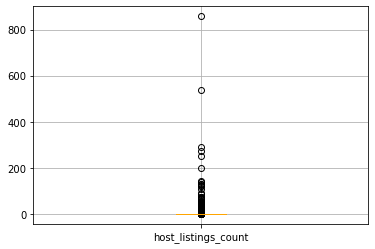

In [130]:
host_listings.boxplot(column=['host_listings_count'], color='#FFA500');

### 3.2 'Home Airbnb', 'Mini-hotel Airbnb' and 'Hotel Airbnb'
In this study, if the host has only one listing, the listing is referred to as 'Home Airbnb'. If the host has between 1 and 16 listings, the listings are referred to as 'Mini-hotel Airbnb'. If the host has more than or equal to 17 listings, the listings are referred to as 'Hotel Airbnb'.

#### 3.2.1 Home Airbnb

In [131]:
home_airbnb_host_count = host_listings[host_listings.host_listings_count==1].shape[0]
print('The number of host that have Home Airbnb: ', home_airbnb_host_count)
home_airbnb_host_proportion = round(host_listings[host_listings.host_listings_count==1].shape[0]/host_listings.shape[0]*100,2)
print('The proportion of host that have Home Airbnb: ', home_airbnb_host_proportion,'%')
home_airbnb_listings_count = df[df.host_listings_count==1]
print('The number of Home Airbnb: ', home_airbnb_listings_count.shape[0])
home_airbnb_listings_proportion = round(df[df.host_listings_count==1].shape[0]/67903*100,2)
print('The proportion of Home Airbnb: ', home_airbnb_listings_proportion,'%')
print('The proportion of available days exceeding 90 in Home Airbnb:',round((home_airbnb_listings_count[home_airbnb_listings_count.availability_365>90].shape[0]/home_airbnb_listings_count.shape[0])*100,2),'%')

The number of host that have Home Airbnb:  38282
The proportion of host that have Home Airbnb:  83.86 %
The number of Home Airbnb:  38282
The proportion of Home Airbnb:  56.38 %
The proportion of available days exceeding 90 in Home Airbnb: 24.76 %


#### 3.2.2 Mini-hotel Airbnb

In [132]:
mini_hotel_airbnb_host_count = host_listings[host_listings.host_listings_count<17].shape[0]-host_listings[host_listings.host_listings_count==1].shape[0]
print('The number of host that have Mini-hotel Airbnb: ', mini_hotel_airbnb_host_count)
mini_hotel_airbnb_host_proportion = round(mini_hotel_airbnb_host_count/host_listings.shape[0]*100,2)
print('The proportion of host that have Mini-hotel Airbnb: ', mini_hotel_airbnb_host_proportion,'%')
mini_hotel_airbnb_listings_count = df.loc[(df.host_listings_count>1) & (df.host_listings_count<17)]
print('The number of Mini-hotel Airbnb: ', mini_hotel_airbnb_listings_count.shape[0])
mini_hotel_airbnb_listings_proportion = round(mini_hotel_airbnb_listings_count.shape[0]/67903*100,2)
print('The proportion of Mini-hotel Airbnb: ', mini_hotel_airbnb_listings_proportion,'%')
print('The proportion of available days exceeding 90 in Home Airbnb:',round((mini_hotel_airbnb_listings_count[mini_hotel_airbnb_listings_count.availability_365>90].shape[0]/mini_hotel_airbnb_listings_count.shape[0])*100,2),'%')
mini_hotel_airbnb_listings_count = df.loc[(df.host_listings_count>1) & (df.host_listings_count<17)]

The number of host that have Mini-hotel Airbnb:  7203
The proportion of host that have Mini-hotel Airbnb:  15.78 %
The number of Mini-hotel Airbnb:  21511
The proportion of Mini-hotel Airbnb:  31.68 %
The proportion of available days exceeding 90 in Home Airbnb: 47.2 %


#### 3.2.3 Hotel Airbnb

In [133]:
hotel_airbnb_host_count = host_listings[host_listings.host_listings_count>=17].shape[0]
print('The number of host that have Hotel Airbnb: ', hotel_airbnb_host_count)
hotel_airbnb_host_proportion = round(host_listings[host_listings.host_listings_count>=17].shape[0]/host_listings.shape[0]*100,2)
print('The proportion of host that have have Hotel Airbnb : ', hotel_airbnb_host_proportion,'%')
hotel_airbnb_listings_count = df[df.host_listings_count>=17]
print('The number of Hotel Airbnb: ', hotel_airbnb_listings_count.shape[0])
home_airbnb_listings_proportion = round(hotel_airbnb_listings_count.shape[0]/67903*100,2)
print('The proportion of Home Airbnb: ', home_airbnb_listings_proportion,'%')
print('The proportion of available days exceeding 90 in Hotel Airbnb:',round((hotel_airbnb_listings_count[hotel_airbnb_listings_count.availability_365>90].shape[0]/hotel_airbnb_listings_count.shape[0])*100,2),'%')

The number of host that have Hotel Airbnb:  163
The proportion of host that have have Hotel Airbnb :  0.36 %
The number of Hotel Airbnb:  8110
The proportion of Home Airbnb:  11.94 %
The proportion of available days exceeding 90 in Hotel Airbnb: 50.11 %


## 4 Map

### 4.1 Add data

In [134]:
# Add geometry and Reproject.
home_airbnb = gpd.GeoDataFrame(home_airbnb_listings_count, geometry=gpd.points_from_xy(home_airbnb_listings_count.longitude, home_airbnb_listings_count.latitude), crs='epsg:4326')
home_airbnb = home_airbnb.to_crs('epsg:27700')

mini_hotel_airbnb= gpd.GeoDataFrame(mini_hotel_airbnb_listings_count, geometry=gpd.points_from_xy(mini_hotel_airbnb_listings_count.longitude, mini_hotel_airbnb_listings_count.latitude), crs='epsg:4326')
mini_hotel_airbnb = mini_hotel_airbnb.to_crs('epsg:27700')

hotel_airbnb = gpd.GeoDataFrame(hotel_airbnb_listings_count, geometry=gpd.points_from_xy(hotel_airbnb_listings_count.longitude,hotel_airbnb_listings_count.latitude), crs='epsg:4326')
hotel_airbnb = hotel_airbnb.to_crs('epsg:27700')

In [135]:
# Spatial join.
home_airbnb_london_ward = gpd.sjoin(home_airbnb, london_ward, how = 'left', op = 'within')

mini_hotel_airbnb_london_ward = gpd.sjoin(mini_hotel_airbnb, london_ward, how = 'left', op = 'within')

hotel_airbnb_london_ward = gpd.sjoin(hotel_airbnb, london_ward, how = 'left', op = 'within')

In [136]:
test=pd.DataFrame()
test=home_airbnb_london_ward.groupby('NAME')['host_id'].count()
test1=pd.DataFrame({"home_airbnb_count":test}).reset_index()

test=pd.DataFrame()
test=mini_hotel_airbnb_london_ward.groupby('NAME')['host_id'].count()
test2=pd.DataFrame({"mini_hotel_airbnb_count":test}).reset_index()

test=pd.DataFrame()
test=hotel_airbnb_london_ward.groupby('NAME')['host_id'].count()
test3=pd.DataFrame({"hotel_airbnb_count":test}).reset_index()

london_ward=pd.merge(left=london_ward, right=test1, how='left', left_on='NAME', right_on='NAME')
london_ward=pd.merge(left=london_ward, right=test2, how='left', left_on='NAME', right_on='NAME')
london_ward=pd.merge(left=london_ward, right=test3, how='left', left_on='NAME', right_on='NAME')
london_ward=london_ward.fillna(0)

london_ward['home_airbnb_count'] = london_ward['home_airbnb_count'].astype('float').astype('int')
london_ward['home_airbnb_proportion']=round(london_ward.home_airbnb_count/(london_ward.home_airbnb_count+london_ward.mini_hotel_airbnb_count+london_ward.hotel_airbnb_count)*100,2)
london_ward['home_airbnb_den']=round(london_ward['home_airbnb_count']/london_ward['HECTARES']*100,2).astype('float')

london_ward['mini_hotel_airbnb_count'] = london_ward['mini_hotel_airbnb_count'].astype('float').astype('int')
london_ward['mini_hotel_airbnb_proportion']=round(london_ward.mini_hotel_airbnb_count/(london_ward.home_airbnb_count+london_ward.mini_hotel_airbnb_count+london_ward.hotel_airbnb_count)*100,2)
london_ward['mini_hotel_airbnb_den']=round(london_ward['mini_hotel_airbnb_count']/london_ward['HECTARES']*100,2).astype('float')

london_ward['hotel_airbnb_count'] = london_ward['hotel_airbnb_count'].astype('float').astype('int')
london_ward['hotel_airbnb_proportion']=round(london_ward.hotel_airbnb_count/(london_ward.home_airbnb_count+london_ward.mini_hotel_airbnb_count+london_ward.hotel_airbnb_count)*100,2)
london_ward['hotel_airbnb_den']=round(london_ward['hotel_airbnb_count']/london_ward['HECTARES']*100,2).astype('float')

london_ward.head()

,NAME,HECTARES,geometry,home_airbnb_count,mini_hotel_airbnb_count,hotel_airbnb_count,home_airbnb_proportion,home_airbnb_den,mini_hotel_airbnb_proportion,mini_hotel_airbnb_den,hotel_airbnb_proportion,hotel_airbnb_den
0,Chessington South,755.173,"POLYGON ((516401.600 160201.800, 516407.300 16...",8,7,0,53.33,1.06,46.67,0.93,0.00,0.00
1,Tolworth and Hook Rise,259.464,"POLYGON ((517829.600 165447.100, 517837.100 16...",9,2,0,81.82,3.47,18.18,0.77,0.00,0.00
2,Berrylands,145.390,"POLYGON ((518107.500 167303.400, 518114.300 16...",13,10,0,56.52,8.94,43.48,6.88,0.00,0.00
3,Alexandra,268.506,"POLYGON ((520480.000 166909.800, 520490.700 16...",65,19,3,74.71,24.21,21.84,7.08,3.45,1.12
4,Beverley,187.821,"POLYGON ((522071.000 168144.900, 522063.900 16...",20,14,0,58.82,10.65,41.18,7.45,0.00,0.00


### 4.2 Generate map

#### 4.2.1 Home Airbnb

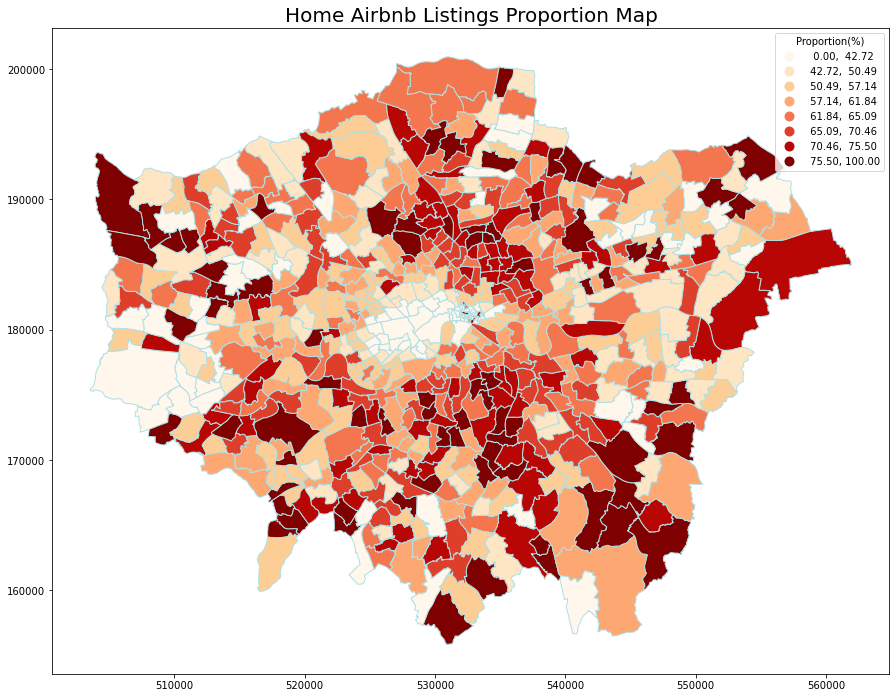

In [143]:
# Home Airbnb Listings Proportion Map
def proportion_1():
    f,ax = plt.subplots(figsize=(15,15))
    london_ward.plot(ax=ax,column='home_airbnb_proportion', edgecolor='#B0E0E6',cmap='OrRd', scheme='quantiles', k=8, legend=True)
    ax.set_title('Home Airbnb Listings Proportion Map', fontdict={'fontsize':'20', 'fontweight':'10'})
    ax.get_legend().set_title("Proportion(%)")
proportion_1()

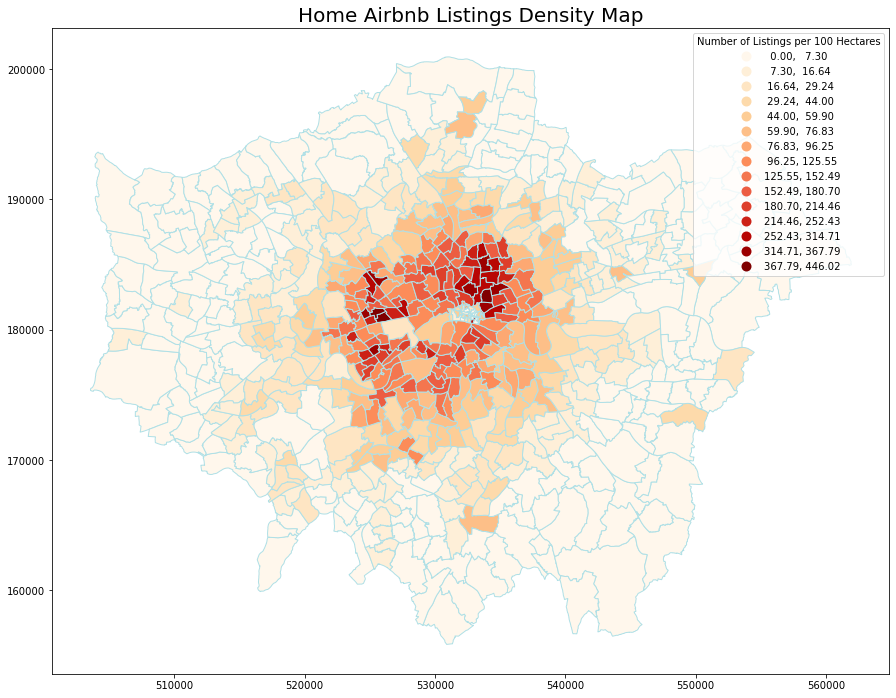

In [144]:
# Home Airbnb Listings Density in Map
def density_1():
    f,ax = plt.subplots(figsize=(15,15))
    london_ward.plot(ax=ax,column='home_airbnb_den', edgecolor='#B0E0E6', cmap='OrRd', scheme='FisherJenks', k=15,legend=True)
    ax.set_title('Home Airbnb Listings Density Map', fontdict={'fontsize':'20', 'fontweight':'10'})
    ax.get_legend().set_title("Number of Listings per 100 Hectares")
density_1()

#### 4.2.2 Mini-hotel Airbnb

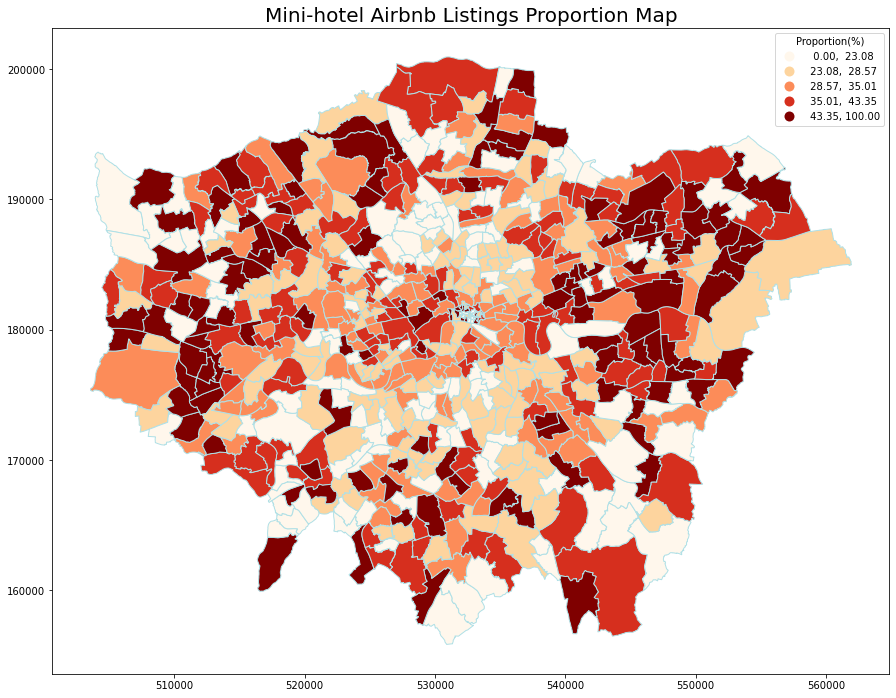

In [145]:
# Mini-hotel Airbnb Listings Proportion Map
def proportion_2():
    f,ax = plt.subplots(figsize=(15,15))
    london_ward.plot(ax=ax,column='mini_hotel_airbnb_proportion', edgecolor='#B0E0E6',cmap='OrRd', scheme='quantiles', k=5, legend=True)
    ax.set_title('Mini-hotel Airbnb Listings Proportion Map', fontdict={'fontsize':'20', 'fontweight':'10'})
    ax.get_legend().set_title("Proportion(%)")
proportion_2()

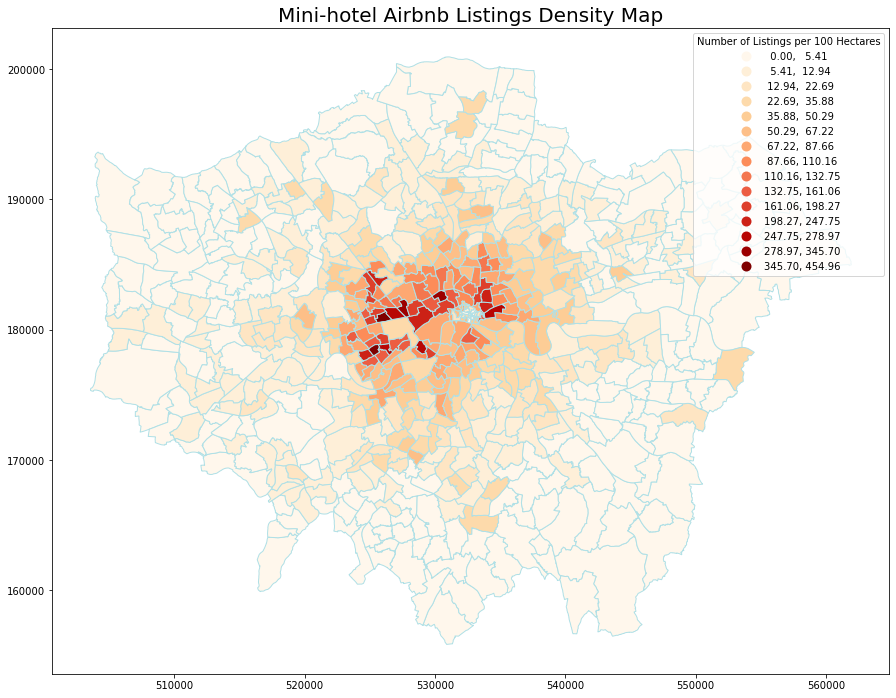

In [146]:
# Mini-hotel Airbnb Listings Density Map
def density_2():
    f,ax = plt.subplots(figsize=(15,15))
    london_ward.plot(ax=ax,column='mini_hotel_airbnb_den', edgecolor='#B0E0E6', cmap='OrRd', scheme='FisherJenks', k=15,legend=True)
    ax.set_title('Mini-hotel Airbnb Listings Density Map', fontdict={'fontsize':'20', 'fontweight':'10'})
    ax.get_legend().set_title("Number of Listings per 100 Hectares")
density_2()

#### 4.2.3 Hotel Airbnb

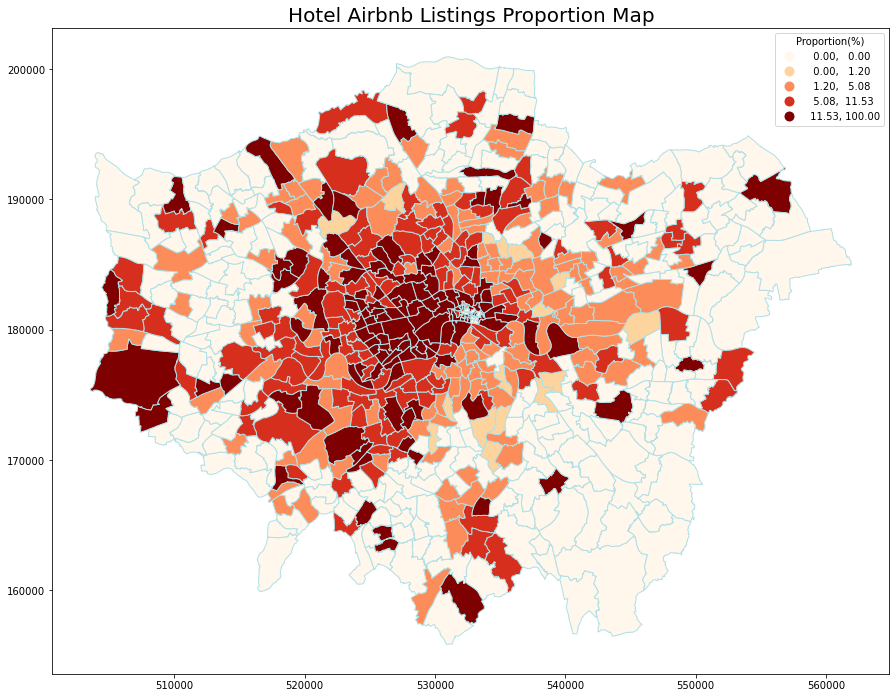

In [147]:
# Hotel Airbnb Listings Proportion Map
def proportion_3():
    f,ax = plt.subplots(figsize=(15,15))
    london_ward.plot(ax=ax,column='hotel_airbnb_proportion', edgecolor='#B0E0E6',cmap='OrRd', scheme='quantiles', k=5, legend=True)
    ax.set_title('Hotel Airbnb Listings Proportion Map', fontdict={'fontsize':'20', 'fontweight':'10'})
    ax.get_legend().set_title("Proportion(%)")
proportion_3()

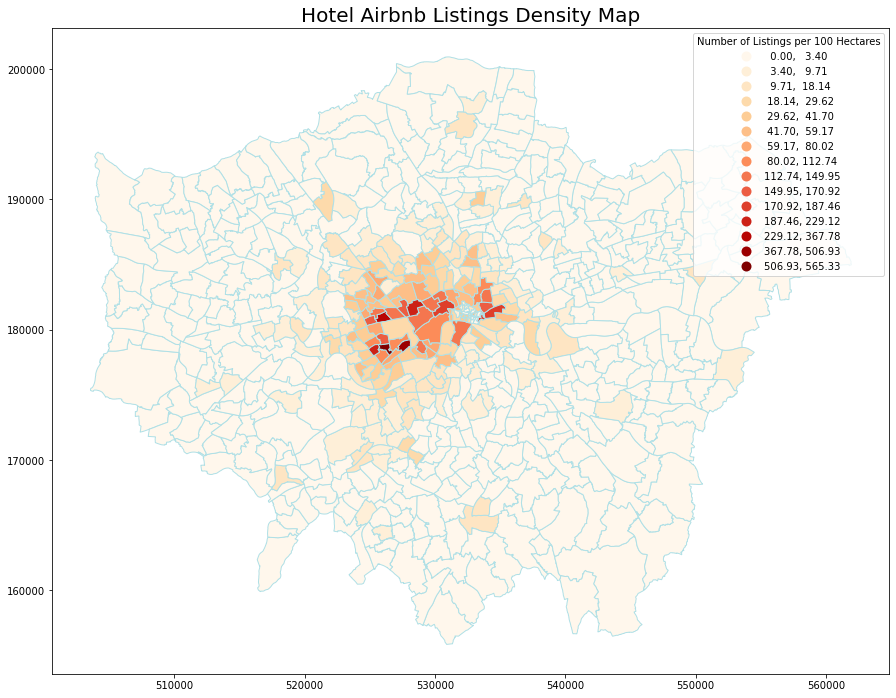

In [148]:
# Hotel Airbnb Listings Density Map
def density_3():
    f,ax = plt.subplots(figsize=(15,15))
    london_ward.plot(ax=ax,column='hotel_airbnb_den', edgecolor='#B0E0E6', cmap='OrRd', scheme='FisherJenks', k=15,legend=True)
    ax.set_title('Hotel Airbnb Listings Density Map', fontdict={'fontsize':'20', 'fontweight':'10'})
    ax.get_legend().set_title("Number of Listings per 100 Hectares")
density_3()